In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [40]:
data = pd.read_excel('Fitness Club Data V4.xlsx')

In [41]:
data.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,20190101,1830.2340,210.0000,6.0,CreditCard,1,0,0,0
1,20190101,1296.6660,1296.6660,6.0,Cash,0,0,0,0
2,20190101,930.4428,105.0000,5.0,Cash,0,0,0,0
3,20190102,798.3696,199.5924,9.0,DirectDebit,0,0,1,0
4,20190103,1206.2400,210.0000,9.0,Cheque,0,0,0,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   enrolldt  24843 non-null  int64  
 1   price     24843 non-null  float64
 2   downpmt   24843 non-null  float64
 3   monthdue  24843 non-null  float64
 4   pmttype   24843 non-null  object 
 5   use       24843 non-null  int64  
 6   age       24843 non-null  int64  
 7   gender    24843 non-null  int64  
 8   default   24843 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.7+ MB


In [45]:
data.describe()

,enrolldt,price,downpmt,monthdue,use,age,gender,default
count,2.484300e+04,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000
mean,2.019814e+07,843.073475,167.852609,8.287290,1.944371,29.203317,0.501993,0.115042
std,6.825852e+03,368.948806,281.767279,7.108381,2.315550,13.277721,0.500006,0.319080
min,2.019010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.019082e+07,587.160000,41.160000,5.500000,0.000000,22.000000,0.000000,0.000000
50%,2.020033e+07,839.160000,84.000000,6.000000,1.000000,28.000000,1.000000,0.000000
75%,2.020101e+07,1049.160000,147.000000,9.000000,3.000000,36.000000,1.000000,0.000000
max,2.021033e+07,7871.850000,7871.850000,120.000000,8.000000,99.000000,1.000000,1.000000


In [47]:
data.isnull().sum()

enrolldt    0
price       0
downpmt     0
monthdue    0
pmttype     0
use         0
age         0
gender      0
default     0
dtype: int64

In [48]:
{col: data[col].unique() for col in data.select_dtypes(include='object').columns}

{'pmttype': array(['CreditCard', 'Cash', 'DirectDebit', 'Cheque'], dtype=object)}

In [5]:
data['enrolldt'].min()

20190101

In [6]:
data['enrolldt'].max()

20210331

## Data preprocessing

In [66]:
data['enroll_years']  = pd.cut(data['enrolldt'], bins = [20181231, 20200101, 20210101, 20210401], labels = ['2019', '2020', '2021'])

In [67]:
data['enroll_years'].isnull().sum()

0

In [68]:
data['age_group'] = pd.cut(data['age'], bins=[-1, 18, 30, 45, 60, 99], labels=['0-18', '19-30', '31-45', '46-60', '60+'])

In [69]:
data['age_group'].isnull().sum()

0

In [105]:
data['enrolldt'] = pd.to_datetime(data['enrolldt'], format='%Y%m%d')
data['enroll_month'] = data['enrolldt'].dt.to_period('M')

In [106]:
data.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default,enroll_years,age_group,enroll_month
0,2019-01-01,1830.2340,210.0000,6.0,CreditCard,1,0,0,0,2019,0-18,2019-01
1,2019-01-01,1296.6660,1296.6660,6.0,Cash,0,0,0,0,2019,0-18,2019-01
2,2019-01-01,930.4428,105.0000,5.0,Cash,0,0,0,0,2019,0-18,2019-01
3,2019-01-02,798.3696,199.5924,9.0,DirectDebit,0,0,1,0,2019,0-18,2019-01
4,2019-01-03,1206.2400,210.0000,9.0,Cheque,0,0,0,0,2019,0-18,2019-01


In [107]:
df_encoded = pd.get_dummies(data, columns=['pmttype', 'age_group', 'enroll_years', 'enroll_month'], drop_first=False)

In [108]:
df_encoded.head()

,enrolldt,price,downpmt,monthdue,use,age,gender,default,pmttype_Cash,pmttype_Cheque,...,enroll_month_2020-06,enroll_month_2020-07,enroll_month_2020-08,enroll_month_2020-09,enroll_month_2020-10,enroll_month_2020-11,enroll_month_2020-12,enroll_month_2021-01,enroll_month_2021-02,enroll_month_2021-03
0,2019-01-01,1830.2340,210.0000,6.0,1,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2019-01-01,1296.6660,1296.6660,6.0,0,0,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2019-01-01,930.4428,105.0000,5.0,0,0,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2019-01-02,798.3696,199.5924,9.0,0,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2019-01-03,1206.2400,210.0000,9.0,0,0,0,0,False,True,...,False,False,False,False,False,False,False,False,False,False


## Enrollment Date

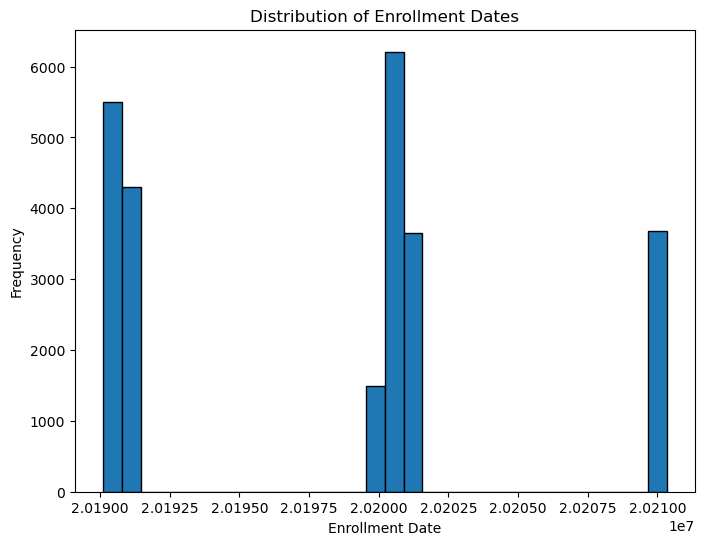

In [72]:
plt.figure(figsize=(8, 6))
plt.hist(data['enrolldt'], bins=30, edgecolor='black')
plt.title("Distribution of Enrollment Dates")
plt.xlabel("Enrollment Date")
plt.ylabel("Frequency")
plt.show()

<Figure size 800x600 with 0 Axes>

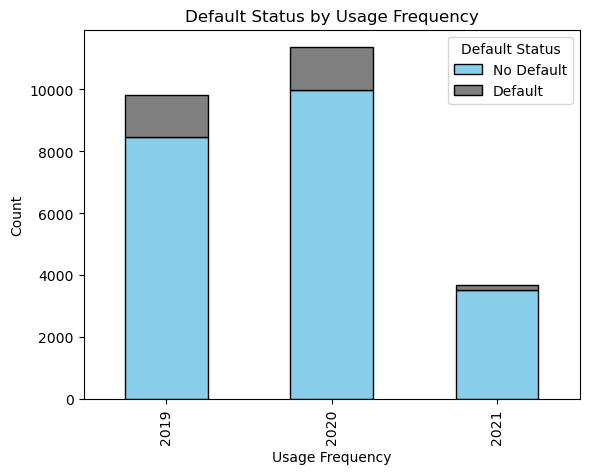

In [73]:
plt.figure(figsize=(8, 6))
data.groupby(['enroll_years', 'default']).size().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'gray'], edgecolor='black')
plt.title("Default Status by Usage Frequency")
plt.xlabel("Usage Frequency")
plt.ylabel("Count")
plt.legend(['No Default', 'Default'], title='Default Status')
plt.show()

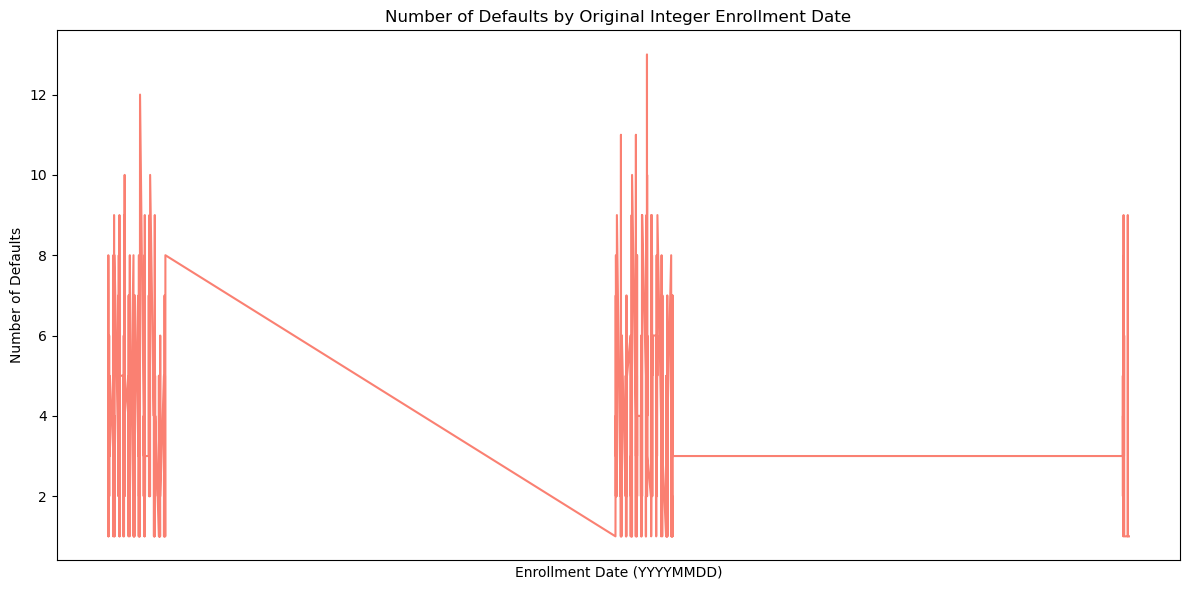

In [74]:
defaults_by_date = data[data['default'] == 1].groupby('enrolldt').size()

plt.figure(figsize=(12, 6))
defaults_by_date.plot(kind='line', color='salmon')
plt.xlabel("Enrollment Date (YYYYMMDD)")
plt.ylabel("Number of Defaults")
plt.title("Number of Defaults by Original Integer Enrollment Date")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to monthly

# Adjust plot layout to ensure labels are visible
plt.tight_layout()
plt.show()

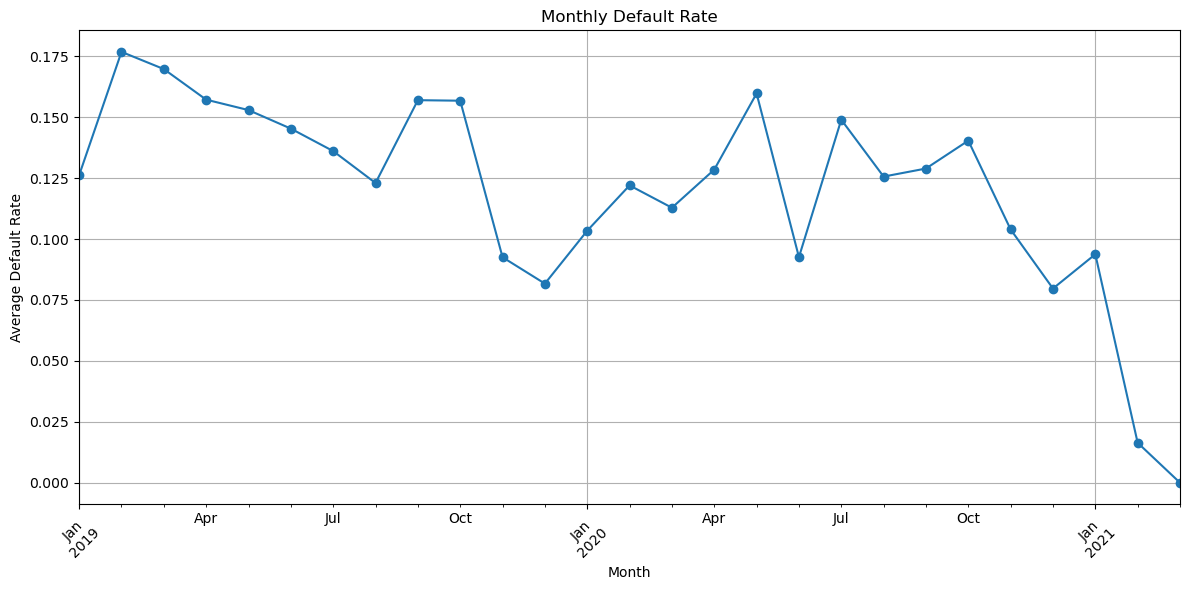

In [104]:


# Group by 'enroll_month' and calculate the default rate per month
monthly_defaults = data.groupby('enroll_month')['default'].mean()

# Plotting the monthly default rate
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_defaults.plot(marker='o')
plt.title("Monthly Default Rate")
plt.xlabel("Month")
plt.ylabel("Average Default Rate")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Price

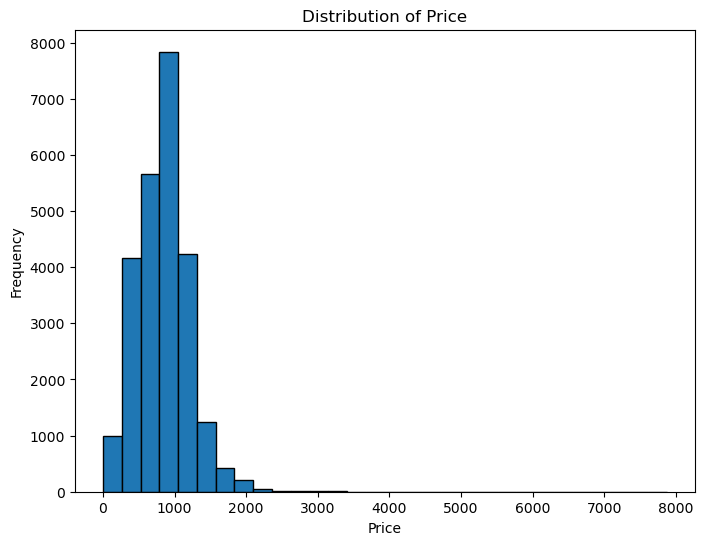

In [75]:
plt.figure(figsize=(8, 6))
plt.hist(data['price'], bins=30, edgecolor='black')
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

/var/folders/tn/srd6cgkd4_72vlcy7nj318q80000gn/T/ipykernel_10422/2031413042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='price', data=data, palette='Set2')


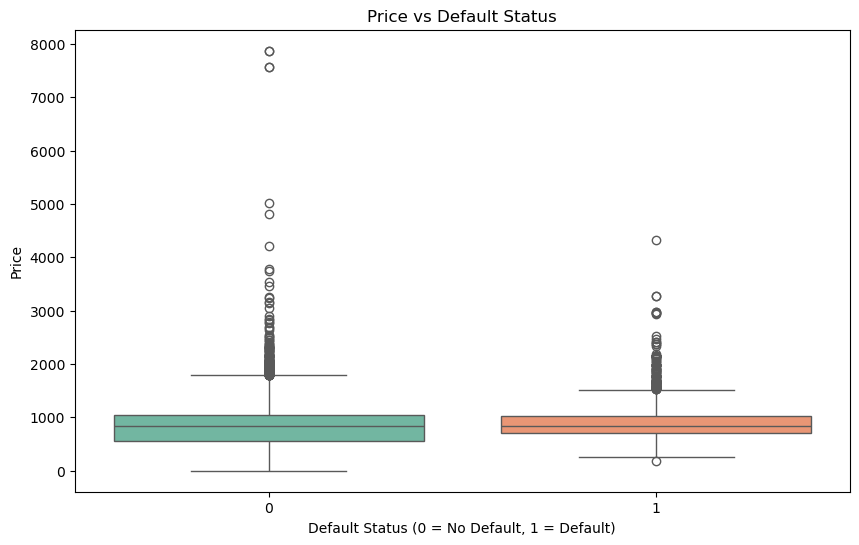

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='price', data=data, palette='Set2')
plt.title("Price vs Default Status")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Price")
plt.show()

## Down payment

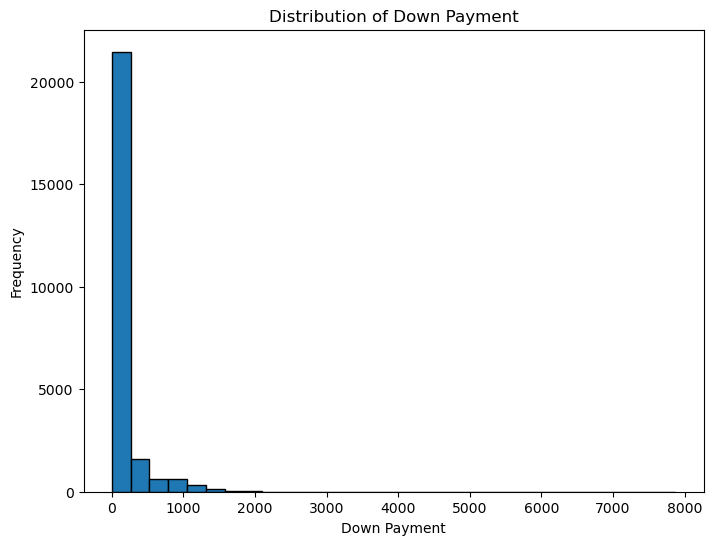

In [77]:
plt.figure(figsize=(8, 6))
plt.hist(data['downpmt'], bins=30, edgecolor='black')
plt.title("Distribution of Down Payment")
plt.xlabel("Down Payment")
plt.ylabel("Frequency")
plt.show()

## Monthly dues

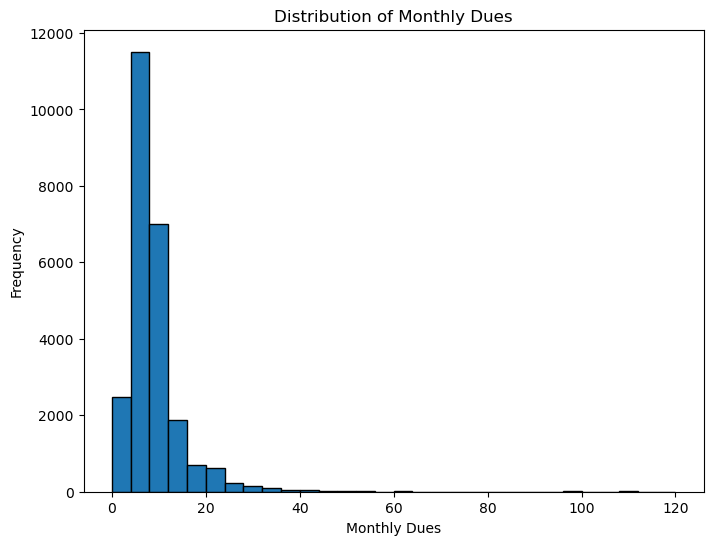

In [78]:
plt.figure(figsize=(8, 6))
plt.hist(data['monthdue'], bins=30, edgecolor='black')
plt.title("Distribution of Monthly Dues")
plt.xlabel("Monthly Dues")
plt.ylabel("Frequency")
plt.show()

## Usage

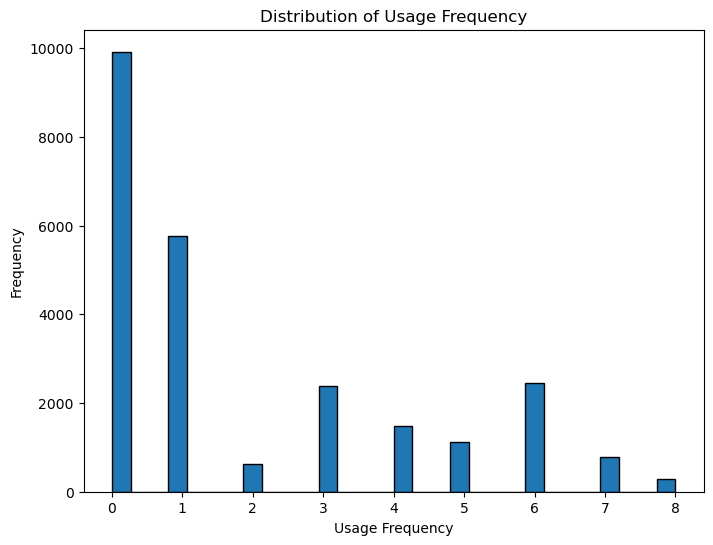

In [79]:
plt.figure(figsize=(8, 6))
plt.hist(data['use'], bins=30, edgecolor='black')
plt.title("Distribution of Usage Frequency")
plt.xlabel("Usage Frequency")
plt.ylabel("Frequency")
plt.show()

/var/folders/tn/srd6cgkd4_72vlcy7nj318q80000gn/T/ipykernel_10422/451788951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='use', data=data, palette='Set3')


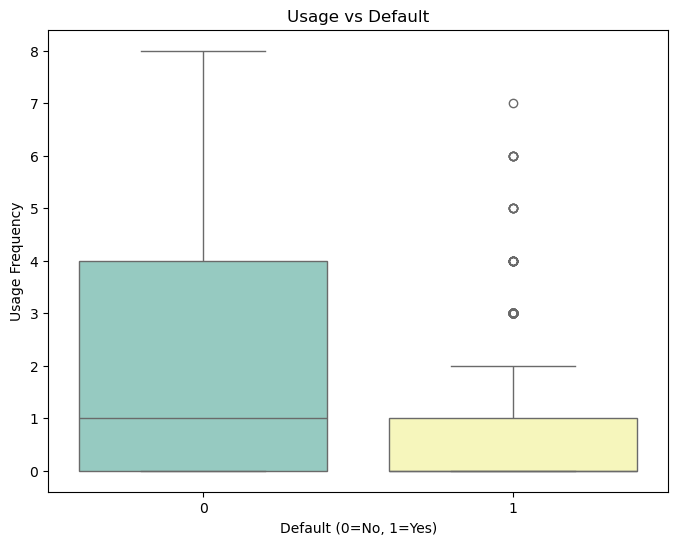

In [80]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='default', y='use', data=data, palette='Set3')
plt.title("Usage vs Default")
plt.xlabel("Default (0=No, 1=Yes)")
plt.ylabel("Usage Frequency")
plt.show()

<Figure size 800x600 with 0 Axes>

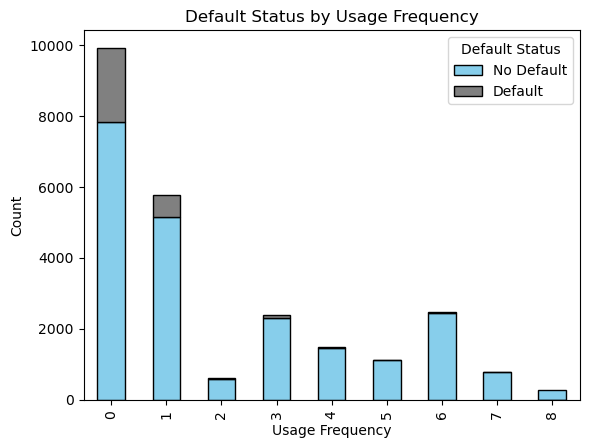

In [81]:
plt.figure(figsize=(8, 6))
data.groupby(['use', 'default']).size().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'gray'], edgecolor='black')
plt.title("Default Status by Usage Frequency")
plt.xlabel("Usage Frequency")
plt.ylabel("Count")
plt.legend(['No Default', 'Default'], title='Default Status')
plt.show()

## Age

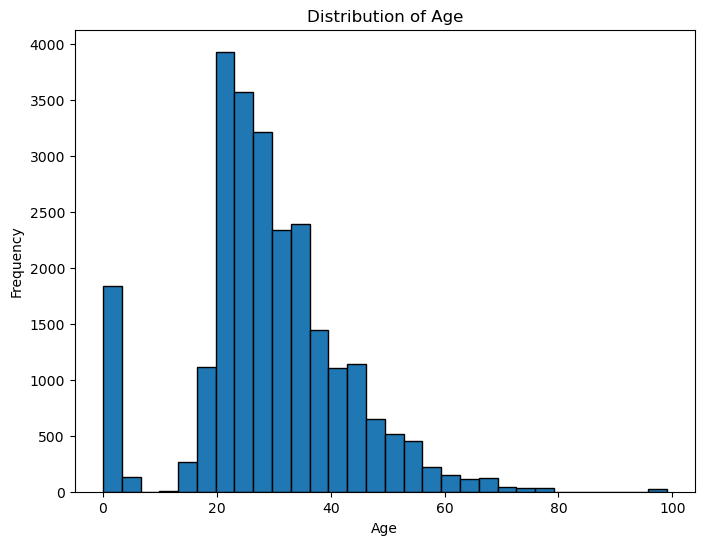

In [82]:
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=30, edgecolor='black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

/var/folders/tn/srd6cgkd4_72vlcy7nj318q80000gn/T/ipykernel_10422/4070097983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='age', data=data, palette='Set2')


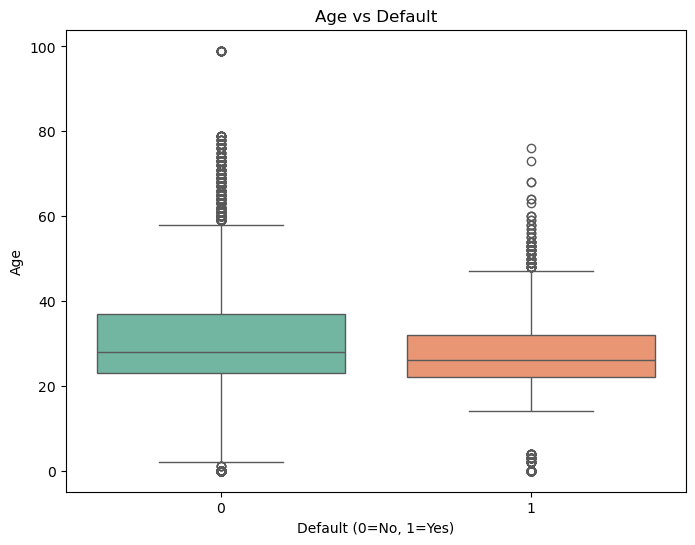

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='default', y='age', data=data, palette='Set2')
plt.title("Age vs Default")
plt.xlabel("Default (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()

<Figure size 800x600 with 0 Axes>

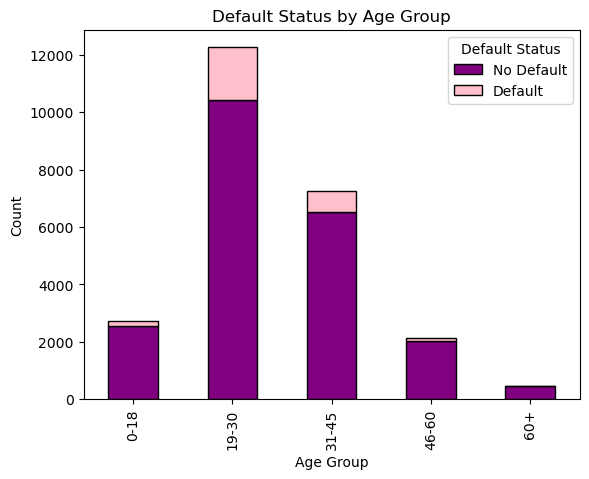

In [84]:
plt.figure(figsize=(8, 6))
data.groupby(['age_group', 'default']).size().unstack().plot(kind='bar', stacked=True, color=['purple', 'pink'], edgecolor='black')
plt.title("Default Status by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(['No Default', 'Default'], title='Default Status')
plt.show()

## Payment type

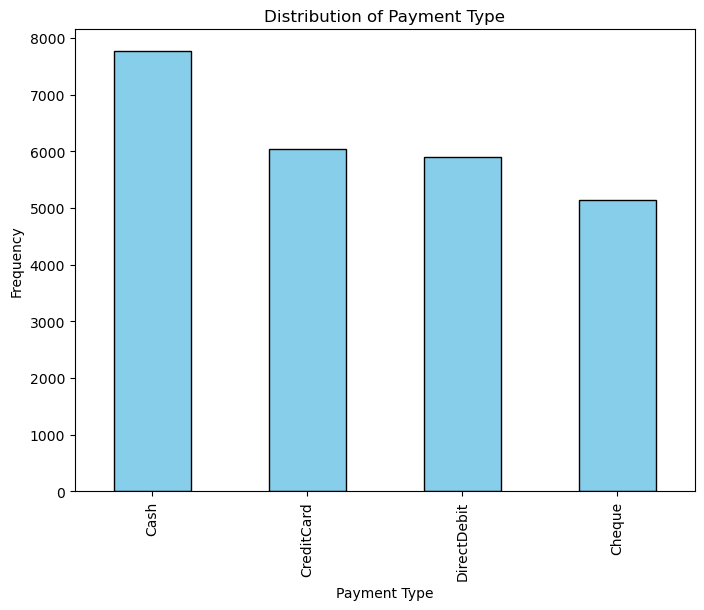

In [85]:
plt.figure(figsize=(8, 6))
data['pmttype'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Frequency")
plt.show()

<Figure size 800x600 with 0 Axes>

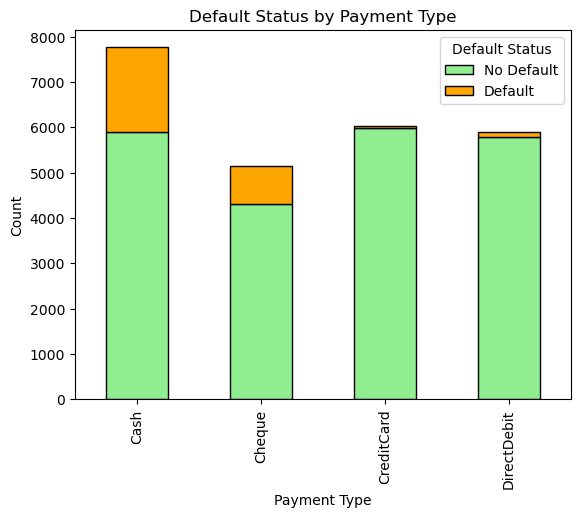

In [86]:
plt.figure(figsize=(8, 6))
data.groupby(['pmttype', 'default']).size().unstack().plot(kind='bar', stacked=True, color=['lightgreen', 'orange'], edgecolor='black')
plt.title("Default Status by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.legend(['No Default', 'Default'], title='Default Status')
plt.show()


## Gender

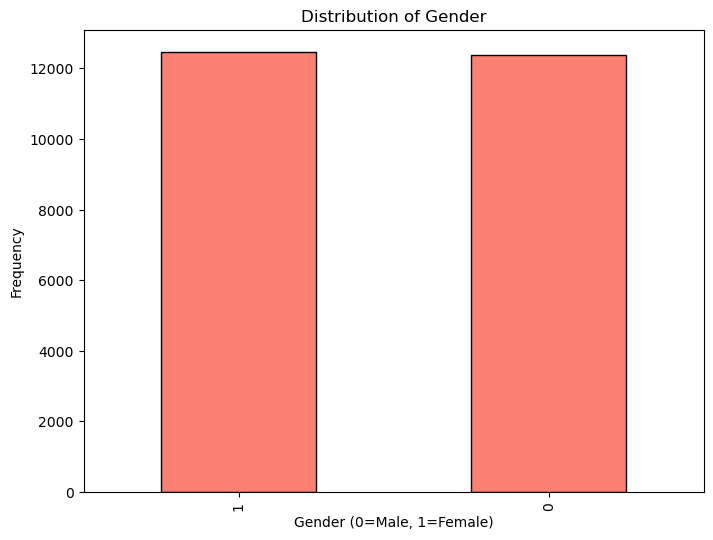

In [87]:
plt.figure(figsize=(8, 6))
data['gender'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Distribution of Gender")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Frequency")
plt.show()

<Figure size 800x600 with 0 Axes>

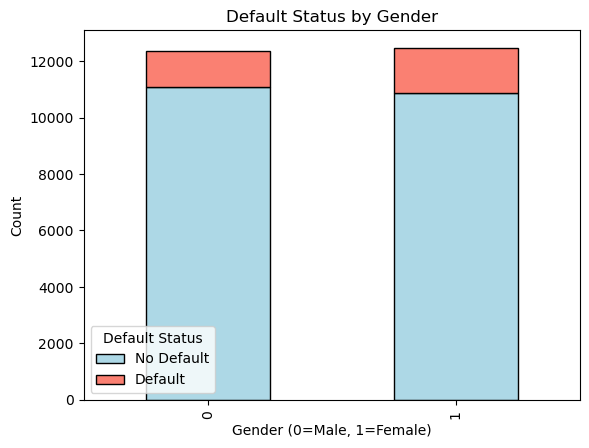

In [88]:
plt.figure(figsize=(8, 6))
data.groupby(['gender', 'default']).size().unstack().plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], edgecolor='black')
plt.title("Default Status by Gender")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Count")
plt.legend(['No Default', 'Default'], title='Default Status')
plt.show()

## Default status

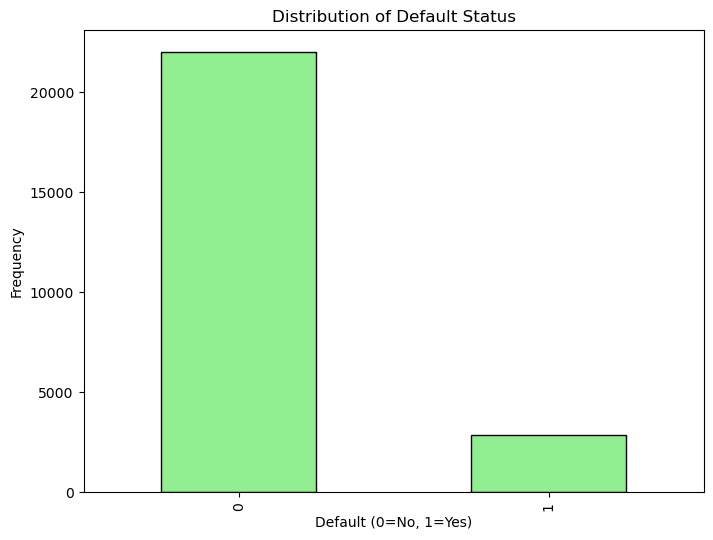

In [89]:
plt.figure(figsize=(8, 6))
data['default'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Distribution of Default Status")
plt.xlabel("Default (0=No, 1=Yes)")
plt.ylabel("Frequency")
plt.show()

## Numerical columns

/Users/emilyhong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Price by Default Status')

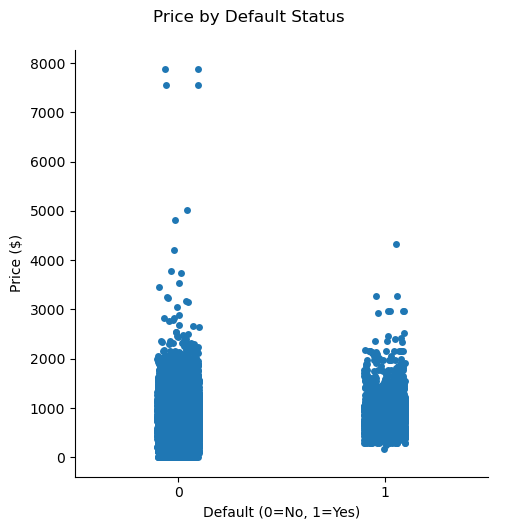

In [90]:
plot_price = sns.catplot(data=data, x="default", y="price")
plot_price.set_axis_labels("Default (0=No, 1=Yes)", "Price ($)")
plot_price.fig.suptitle("Price by Default Status", y=1.05)

/Users/emilyhong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Down Payment by Default Status')

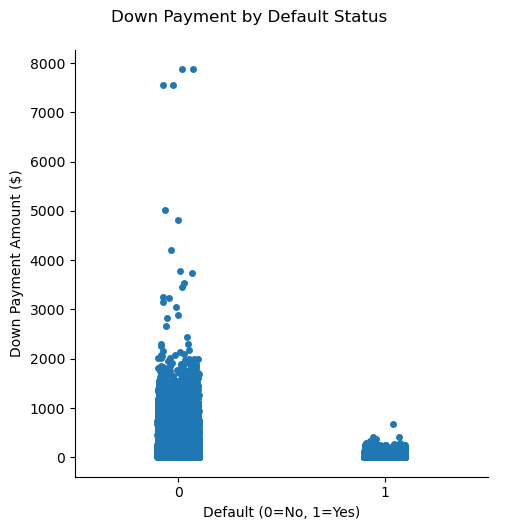

In [91]:
plot = sns.catplot(data=data, x="default", y="downpmt")
plot.set_axis_labels("Default (0=No, 1=Yes)", "Down Payment Amount ($)")
plot.fig.suptitle("Down Payment by Default Status", y=1.05)

In [92]:
correlation_matrix = data[['price', 'downpmt', 'monthdue', 'use']].corr()
correlation_matrix

,price,downpmt,monthdue,use
price,1.000000,0.277764,-0.136978,-0.059150
downpmt,0.277764,1.000000,-0.035659,0.006335
monthdue,-0.136978,-0.035659,1.000000,0.022503
use,-0.059150,0.006335,0.022503,1.000000


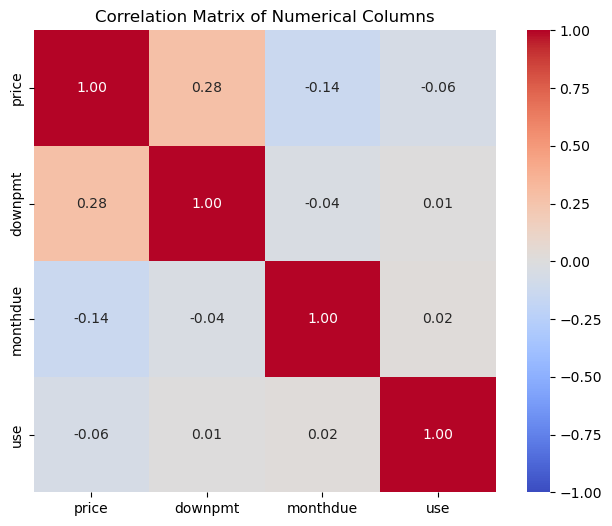

In [93]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt=".2f")
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

In [94]:
plt.figure(figsize=(8, 6))
data.groupby(['', 'default']).size().unstack().plot(kind='bar', stacked=True, color=['lightgreen', 'orange'], edgecolor='black')
plt.title("Monthly Dues vs Default Status")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Monthly Dues")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
data.groupby(['pmttype', 'default']).size().unstack().plot(kind='bar', stacked=True, color=['lightgreen', 'orange'], edgecolor='black')
plt.title("Default Status by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.legend(['No Default', 'Default'], title='Default Status')
plt.show()

KeyError: ''

<Figure size 800x600 with 0 Axes>

## Models

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [110]:
feature_columns = [col for col in df_encoded.columns if col not in ['default', 'enrolldt', 'gender']]
X = df_encoded[feature_columns]
y = df_encoded['default']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
scaler = StandardScaler()
X_train[feature_columns] = scaler.fit_transform(X_train[feature_columns])
X_test[feature_columns] = scaler.transform(X_test[feature_columns])

In [113]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_report = classification_report(y_test, y_pred_log_reg, output_dict=True)
log_reg_df = pd.DataFrame(log_reg_report).transpose()
log_reg_df

/Users/emilyhong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,precision,recall,f1-score,support
0,0.936132,0.963481,0.949610,6572.000000
1,0.651669,0.509648,0.571975,881.000000
accuracy,0.909835,0.909835,0.909835,0.909835
macro avg,0.793901,0.736565,0.760792,7453.000000
weighted avg,0.902507,0.909835,0.904971,7453.000000


In [114]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
dec_tree_report = classification_report(y_test, y_pred_dec_tree, output_dict=True)

# Displaying Decision Tree report
dec_tree_df = pd.DataFrame(dec_tree_report).transpose()
dec_tree_df

,precision,recall,f1-score,support
0,0.938857,0.934571,0.936709,6572.000000
1,0.527991,0.545970,0.536830,881.000000
accuracy,0.888635,0.888635,0.888635,0.888635
macro avg,0.733424,0.740271,0.736770,7453.000000
weighted avg,0.890289,0.888635,0.889440,7453.000000


In [115]:
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
rand_forest_report = classification_report(y_test, y_pred_rand_forest, output_dict=True)

# Displaying Random Forest report
rand_forest_df = pd.DataFrame(rand_forest_report).transpose()
rand_forest_df

,precision,recall,f1-score,support
0,0.940027,0.965916,0.952795,6572.000000
1,0.680000,0.540295,0.602151,881.000000
accuracy,0.915604,0.915604,0.915604,0.915604
macro avg,0.810013,0.753106,0.777473,7453.000000
weighted avg,0.909290,0.915604,0.911347,7453.000000


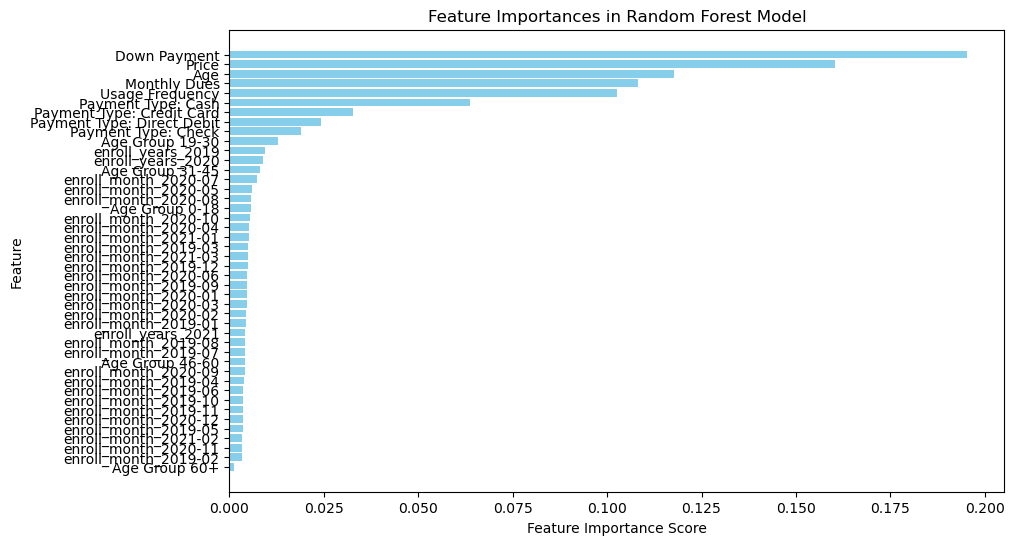

In [116]:
feature_importances = rand_forest.feature_importances_
features = X_train.columns

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

readable_labels = {
    'price': 'Price',
    'age': 'Age',
    'use': 'Usage Frequency',
    'downpmt': 'Down Payment',
    'monthdue': 'Monthly Dues',
    'pmttype_CreditCard': 'Payment Type: Credit Card',
    'pmttype_Cash': 'Payment Type: Cash',
    'pmttype_DirectDebit': 'Payment Type: Direct Debit',
    'pmttype_Cheque': 'Payment Type: Check',
    'age_group_0-18': 'Age Group 0-18',
    'age_group_19-30': 'Age Group 19-30',
    'age_group_31-45': 'Age Group 31-45',
    'age_group_46-60': 'Age Group 46-60',
    'age_group_60+': 'Age Group 60+'
}
importance_df['Feature'] = importance_df['Feature'].replace(readable_labels)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances in Random Forest Model")
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

In [65]:
grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost.fit(X_train, y_train)
y_pred_grad_boost = grad_boost.predict(X_test)
grad_boost_report = classification_report(y_test, y_pred_grad_boost, output_dict=True)

# Displaying Gradient Boosting report
grad_boost_df = pd.DataFrame(grad_boost_report).transpose()
grad_boost_df

,precision,recall,f1-score,support
0,0.938776,0.965916,0.952152,6572.000000
1,0.675832,0.530079,0.594148,881.000000
accuracy,0.914397,0.914397,0.914397,0.914397
macro avg,0.807304,0.747998,0.773150,7453.000000
weighted avg,0.907694,0.914397,0.909834,7453.000000
